# Shap explainers and gradient-boosting trees

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import shap

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules

# Numerical Example

In [3]:
df = pd.read_csv("Data/train.csv")
df1 = numerical_df = df.select_dtypes(include=['number'])

In [4]:
X = df1[df1.columns[:-1]]
y = df1.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1,
                                   depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test,y_test),
                   plot=True)

# Make predictions
y_pred = catboost_model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Shap analysis

In [6]:
# Explain predictions with SHAP
explainer = shap.Explainer(catboost_model, X_train)
shap_values = explainer(X_test)

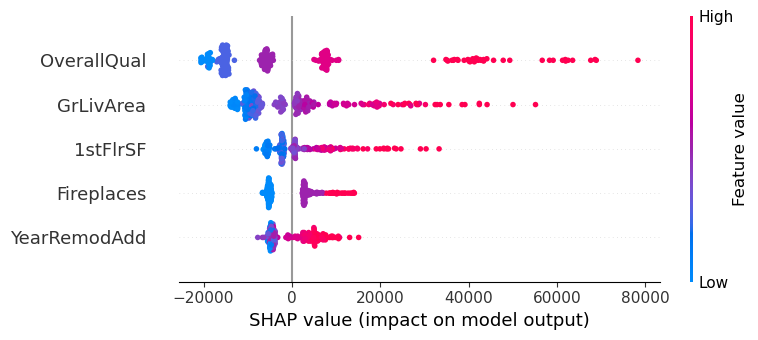

In [7]:
# Summary plot
shap.summary_plot(shap_values, X_test, max_display=5)

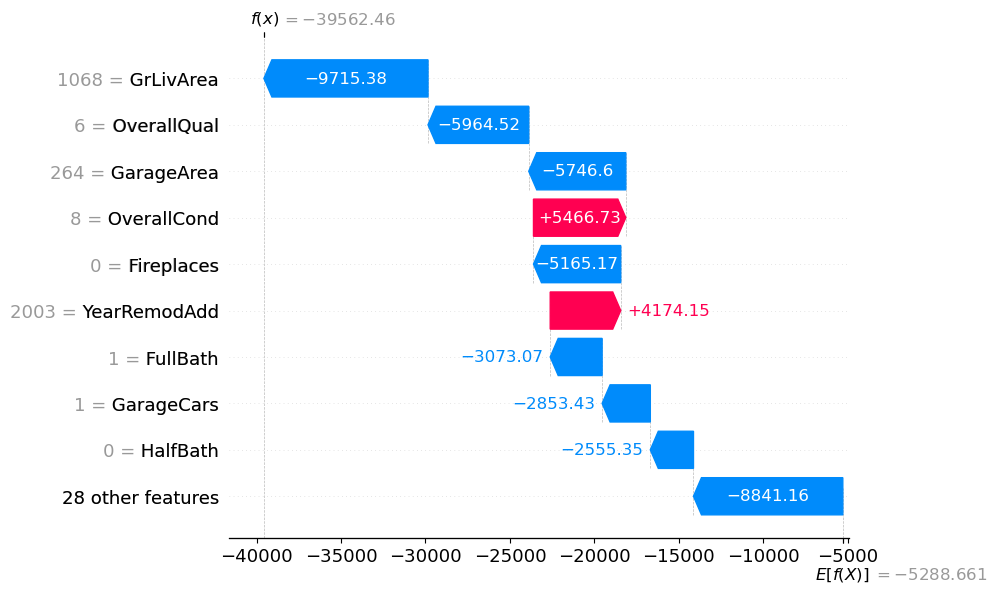

In [8]:
# Waterfall plot for a single observation
shap.plots.waterfall(shap_values[0])

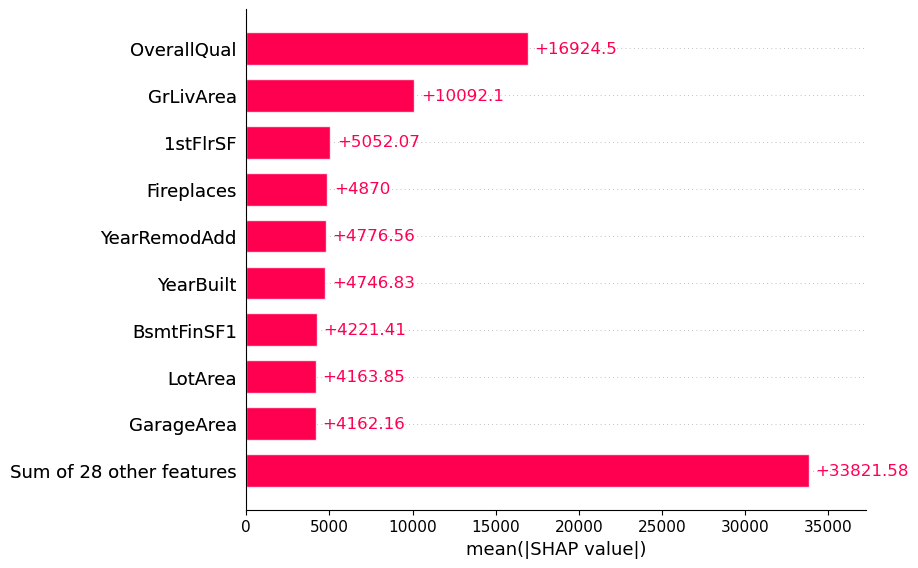

In [9]:
shap.plots.bar(shap_values)

More plots available: https://shap.readthedocs.io/en/latest/generated/shap.plots.bar.html

## Your turn

First, plot the correlation of the outputs with the actual home sale prices.

## Next, add in the categorical variables then train a new CatBoost model. Run this through SHAP
What do you observe? What are the top variables now?